# Unlocking the Starbucks Strategy

### Group Project by:

##### Chris Tran  /  Emil Rodulfo  /  Tim Besaw

In [15]:
%matplotlib inline

# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from numpy.polynomial.polynomial import polyfit
from mpl_toolkits.mplot3d import Axes3D

In [2]:
csv_path = "data/Starbucks Locations Data.csv"

global_df = pd.read_csv(csv_path)

total_locations = len(global_df)

global_df.head()

,Brand,Ownership Type,City,State/Province,Country,Longitude,Latitude,Continent,Zip Code
0,Starbucks,Licensed,Andorra la Vella,7,AD,1.53,42.51,Europe,NaN
1,Starbucks,Licensed,Ajman,AJ,AE,55.47,25.42,Asia,NaN
2,Starbucks,Licensed,Ajman,AJ,AE,55.47,25.39,Asia,NaN
3,Starbucks,Licensed,Abu Dhabi,AZ,AE,54.38,24.48,Asia,NaN
4,Starbucks,Licensed,Abu Dhabi,AZ,AE,54.54,24.51,Asia,NaN


## Global Starbucks Locations

In [3]:
continent_df = global_df.groupby(["Continent"]).agg({'Ownership Type':'count'})

continent_df = continent_df.head(10)

continent_df.reset_index(inplace=True)

continent_df.head()

,Continent,Ownership Type
0,Africa,43
1,Asia,7486
2,Europe,1883
3,North America,15381
4,Oceania,46


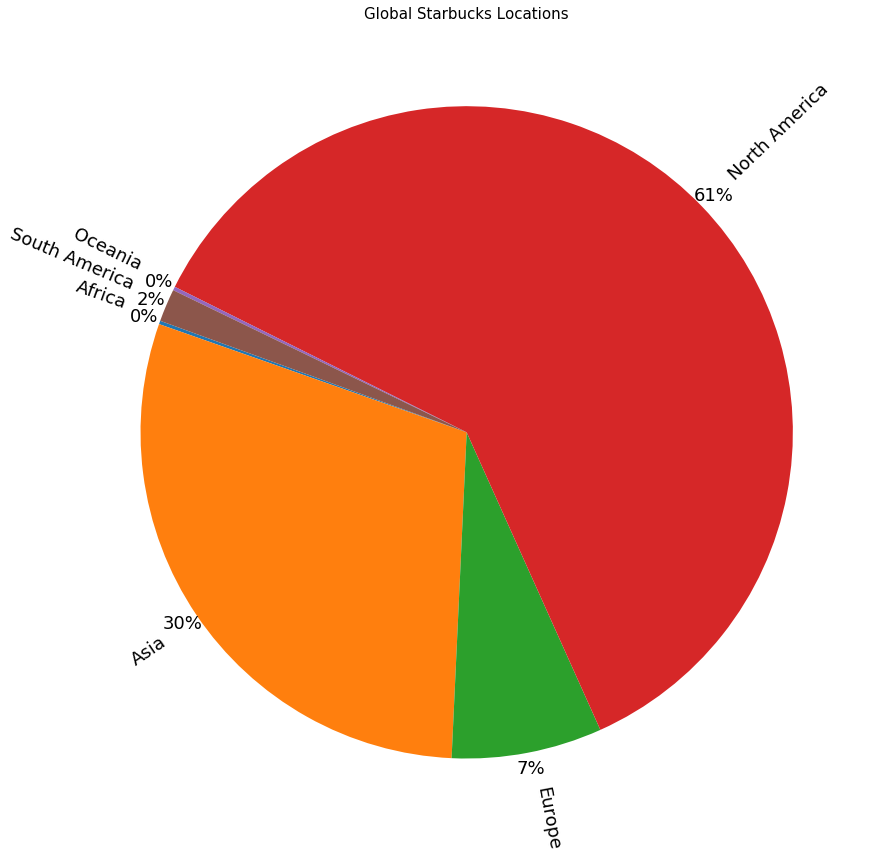

In [16]:
explode = [0,0,0,0,0,0]
plt.figure(figsize=(30,15))

# Plot chart
ax1 = plt.subplot(aspect='equal')
continent_df.plot(kind='pie', y = 'Ownership Type', labels=continent_df['Continent'], ax=ax1, autopct='%1.0f%%', pctdistance = 1.05, rotatelabels=90, explode = explode,
            startangle=160, fontsize=18, legend = False)

ax1.set_ylabel('')
ax1.set_title('Global Starbucks Locations', y=1, fontsize = 15)

plt.savefig("Images/Global Starbucks Locations.png")

## Top 10 Countries Globally

In [19]:
# Only import the relevant
reducedglobal_df = global_df.groupby(["Country"]).agg({'Ownership Type':'count'})
reducedglobal_df = reducedglobal_df.sort_values(by=('Ownership Type'), ascending=False )

reducedglobal_df = reducedglobal_df.head(10)

reducedglobal_df.reset_index(inplace=True)

# Takes sum for later use (pie charts)
total_locations_top_country = reducedglobal_df["Ownership Type"].sum()

reducedglobal_df.head()

,Country,Ownership Type
0,US,13311
1,CN,2734
2,CA,1415
3,JP,1237
4,KR,993


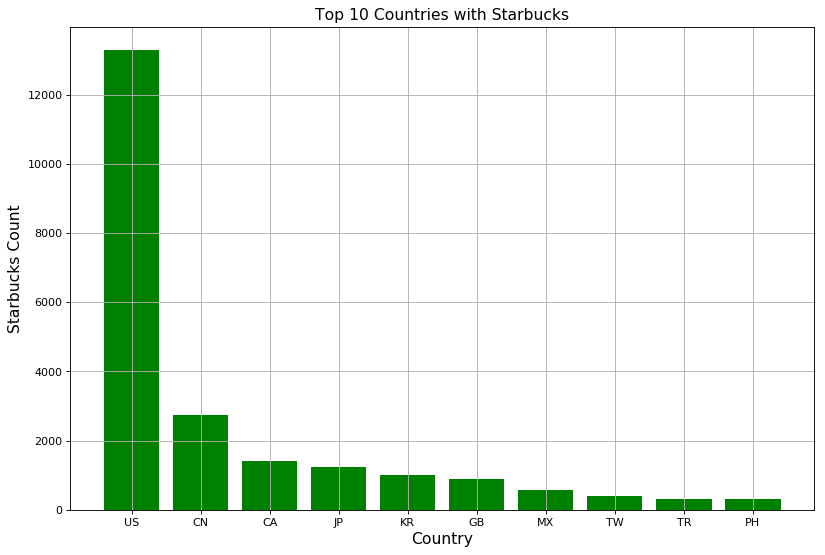

In [20]:
# Size figure prior to adding data
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

# Build Chart
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Starbucks Count")

# Setup x axis
x_axis = np.arange(len(reducedglobal_df))

# Create a bar chart based upon the above data
plt.bar(x_axis, reducedglobal_df["Ownership Type"], color="g", align="center")
plt.ylabel('Starbucks Count', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.title('Top 10 Countries with Starbucks', fontsize = 14)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, reducedglobal_df["Country"])
plt.grid()

plt.savefig("Images/Top 10 Countries with Starbucks.png")

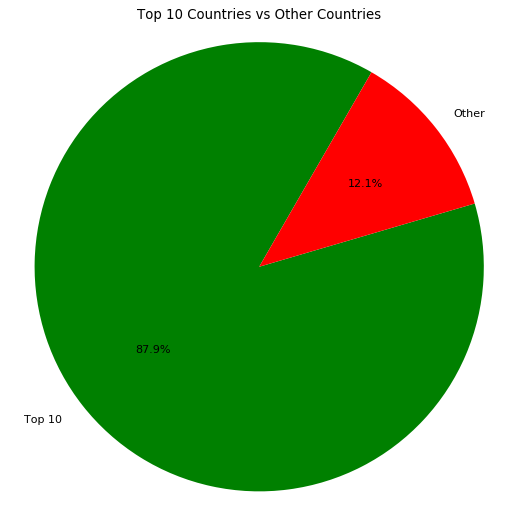

In [26]:
# Top 10 Countries Pie Chart

# Create Label Categories and Data Values
label = ["Top 10 ", "Other"]
value = [(total_locations_top_country / total_locations), ((total_locations - total_locations_top_country) / total_locations) ]
colors = ["green", "red"]
explode = (0.0, 0)

# Size figure prior to adding data
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

# Add data to pie chart
plt.title("Top 10 Countries vs Other Countries")
plt.pie(value, explode=explode, labels=label, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=60)
plt.axis("equal")

plt.savefig("Images/Top 10 Countries vs Other Countries.png")

## Top 10 Cities Globally

In [27]:
# Global Cities

reducedglobalcities_df = global_df.groupby(["City"]).agg({'Ownership Type':'count'})
reducedglobalcities_df = reducedglobalcities_df.sort_values(by=('Ownership Type'), ascending=False )

reducedglobalcities_df = reducedglobalcities_df.head(10)

reducedglobalcities_df.reset_index(inplace=True)

# Takes sum for later use (pie charts)
total_locations_top_city = reducedglobalcities_df["Ownership Type"].sum()

reducedglobalcities_df.iloc[0, reducedglobalcities_df.columns.get_loc('City')] = "Shanghai"
reducedglobalcities_df.iloc[2, reducedglobalcities_df.columns.get_loc('City')] = "Beijing"

reducedglobalcities_df.head()

,City,Ownership Type
0,Shanghai,542
1,Seoul,243
2,Beijing,234
3,New York,230
4,London,215


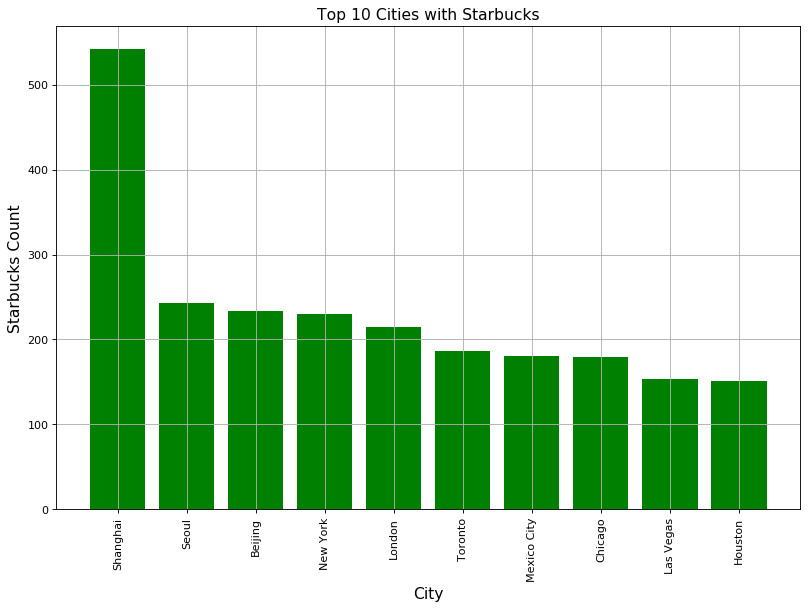

In [28]:
# Build Chart

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

# Setup x axis
x_axis = np.arange(len(reducedglobalcities_df))

# Create a bar chart based upon the above data
plt.bar(x_axis, reducedglobalcities_df["Ownership Type"], color="g", align="center")

plt.ylabel('Starbucks Count', fontsize = 14)
plt.xlabel('City', fontsize = 14)
plt.title('Top 10 Cities with Starbucks', fontsize = 14)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, reducedglobalcities_df["City"], rotation=90)
plt.grid()

plt.savefig("Images/Top 10 Cities with Starbucks.png")

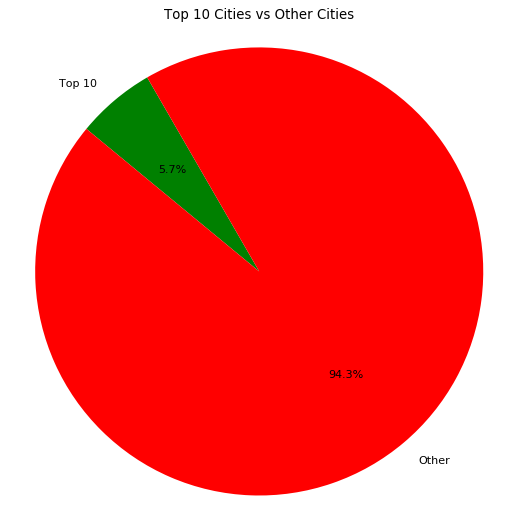

In [60]:
# Top 10 Cities Pie Chart

# Create Label Categories and Data Values
label = ["Top 10 ", "Other"]
value = [(total_locations_top_city / total_locations), ((total_locations - total_locations_top_city) / total_locations)]
colors = ["green", "red"]
explode = (0.0, 0)

# size figure prior to adding data
fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')

# add data to pie chart
plt.title("Top 10 Cities vs Other Cities")
plt.pie(value, explode=explode, labels=label, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=120)
plt.axis("equal")

plt.savefig("Images/Top 10 Cities vs Other Cities.png")

## Starbucks Timeline

46


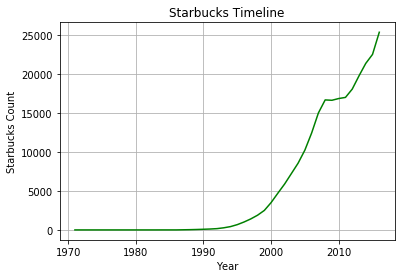

In [30]:
# Starbucks Timeline

# Load Original Raw Starbucks File
starbucks_year_to_load = "data/Starbucks Timeline Data.csv"

# Read the data into dataframe
star_year_df = pd.read_csv(starbucks_year_to_load)

# Print the length (record count) and head for reference / debugging
print(len(star_year_df))
star_year_df.head()

# Create Line Chart

# Plot the charts and apply some styling
year_cnt, = plt.plot(star_year_df["Year"], star_year_df["Count"], color="green", label="Count")

# Add labels to X and Y axes :: Add title
plt.title("Starbucks Timeline")
plt.xlabel("Year")
plt.ylabel("Starbucks Count")

# Add in a grid for the chart
plt.grid()

plt.savefig("Images/Starbucks Timeline.png")

In [31]:
# Load Original Raw Starbucks File
starbucks_data_to_load = "data/Starbucks Locations Data.csv"

# Read the data into dataframe
star_df = pd.read_csv(starbucks_data_to_load)

star_df.head()

,Brand,Ownership Type,City,State/Province,Country,Longitude,Latitude,Continent,Zip Code
0,Starbucks,Licensed,Andorra la Vella,7,AD,1.53,42.51,Europe,NaN
1,Starbucks,Licensed,Ajman,AJ,AE,55.47,25.42,Asia,NaN
2,Starbucks,Licensed,Ajman,AJ,AE,55.47,25.39,Asia,NaN
3,Starbucks,Licensed,Abu Dhabi,AZ,AE,54.38,24.48,Asia,NaN
4,Starbucks,Licensed,Abu Dhabi,AZ,AE,54.54,24.51,Asia,NaN


## US Starbucks Analysis

In [32]:
# Create new dataset for just data located in US
star_filter_df = star_df.loc[star_df["Country"] == "US", :]

# Make a copy of the file to make it independent from previous data frames
star_us_df = star_filter_df.copy() 

# Change Zip Code format to string so that it can preserve leading zeros ... pad with leading zeros
star_us_df["Zip Code"] = star_us_df["Zip Code"].astype(int)
star_us_df["Zip Code"] = star_us_df["Zip Code"].astype(str)
star_us_df["Zip Code"] = star_us_df["Zip Code"].apply('{:0>5}'.format)

# Reset Index / Sort by Zip
star_us_df.reset_index(inplace=True)

# Export combined data for practice and outside confirmation of results
star_us_df.to_csv('Data/Starbucks US.csv', index=False)

star_us_df.head()

# Save total US locations for later (pie charts)
total_locations_us = len(star_us_df)

## US Starbucks by Zip Code

In [33]:
############################################################
#   Group data based on zip code to get counts per zip     #
#   Data will be merged into master zipcode data set       #
############################################################

star_zipcode_df = star_us_df.groupby(["Zip Code"]).agg({"Brand": "count"})
star_zipcode_df .sort_values("Zip Code")
star_zipcode_df.reset_index(inplace=True)

# Rename columns
star_zipcode_df.rename(inplace=True, columns={
    "Brand": "Count Starbucks"})

# Export combined data for practice and outside confirmation of results
star_zipcode_df.to_csv('Data/Starbucks Zip Code Count.csv', index=False)

star_zipcode_df.head()

,Zip Code,Count Starbucks
0,01035,1
1,01040,1
2,01056,2
3,01201,1
4,01331,1


## US Starbucks by State

In [34]:
############################################################
#   Group data based on state to get counts per state      #
############################################################

star_state_df = star_us_df.groupby(["State/Province"]).agg({"Brand": "count"})
# Rename columns
star_state_df.rename(inplace=True, columns={
    "Brand": "Count Starbucks"})

# Modify Sort Order
star_state_df = star_state_df.sort_values(by=("Count Starbucks"), ascending=False)
star_state_df.reset_index(inplace=True)

# Reduce data frame to the top 10 records
star_state_df = star_state_df.head(10)

# Takes sum for later use (pie charts)
total_locations_top_state = star_state_df["Count Starbucks"].sum()

star_state_df.head()

,State/Province,Count Starbucks
0,CA,2782
1,TX,1024
2,WA,747
3,FL,671
4,NY,627


## Top 10 States - Bar Chart

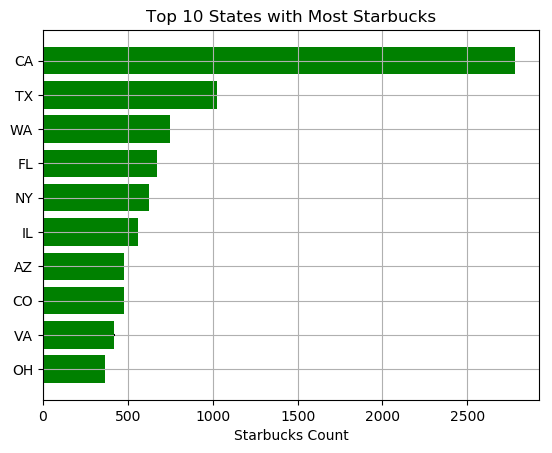

In [35]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(star_state_df))
error = np.random.rand(len(star_state_df))

ax.barh(y_pos, star_state_df["Count Starbucks"], xerr=error, align='center',
       color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(star_state_df["State/Province"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Starbucks Count')
ax.set_title("Top 10 States with Most Starbucks")
ax.grid(True)

plt.savefig("Images/Top 10 States Bar.png")

## Top 10 States - Pie Chart

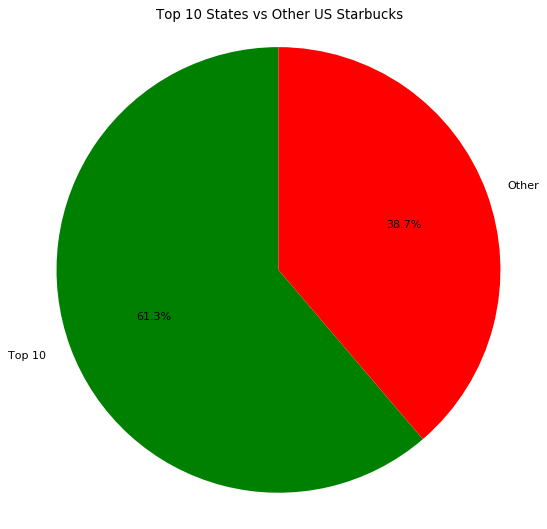

In [36]:
# Create Label Categories and Data Values
label = ["Top 10 ", "Other"]
value = [(total_locations_top_state / total_locations_us), ((total_locations_us - total_locations_top_state) / total_locations_us) ]
colors = ["green", "red"]
explode = (0.0, 0)

# size figure prior to adding data
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

# add data to pie chart
plt.title("Top 10 States vs Other US Starbucks")
plt.pie(value, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")

plt.savefig("Images/Top 10 States Pie.png")

## US Starbucks by City

In [37]:
############################################################
#   Group data based on city to get counts per city        #
############################################################

star_city_df = star_us_df.groupby(by=["City"]).agg({"Brand": "count"})
# Rename columns
star_city_df.rename(inplace=True, columns={
    "Brand": "Count Starbucks"})

# Modify Sort Order
star_city_df = star_city_df.sort_values(by=("Count Starbucks"), ascending=False)
star_city_df.reset_index(inplace=True)

# Reduce data frame to the top 10 records
star_city_df = star_city_df.head(10)

# Takes sum for later use (pie charts)
total_locations_top_city = star_city_df["Count Starbucks"].sum()

star_city_df.head()

,City,Count Starbucks
0,New York,230
1,Chicago,179
2,Las Vegas,153
3,Seattle,151
4,Houston,151


## Top 10 Cities - Bar Chart

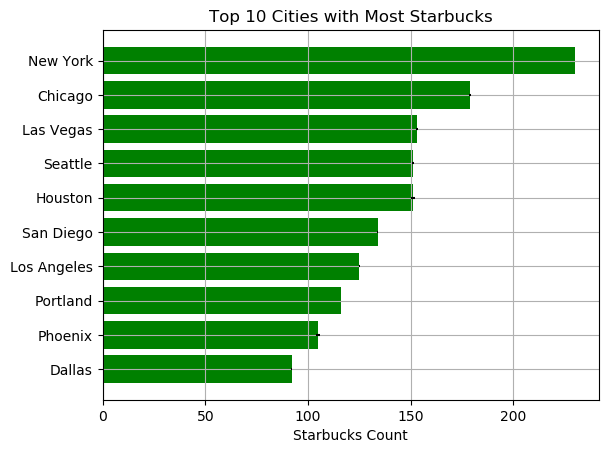

In [38]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(star_city_df))
error = np.random.rand(len(star_city_df))

ax.barh(y_pos, star_city_df["Count Starbucks"], xerr=error, align='center',
       color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(star_city_df["City"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Starbucks Count')
ax.set_title("Top 10 Cities with Most Starbucks")
ax.grid(True)

plt.savefig("Images/Top 10 Cities Bar.png")

## Top 10 Cities - Pie Chart

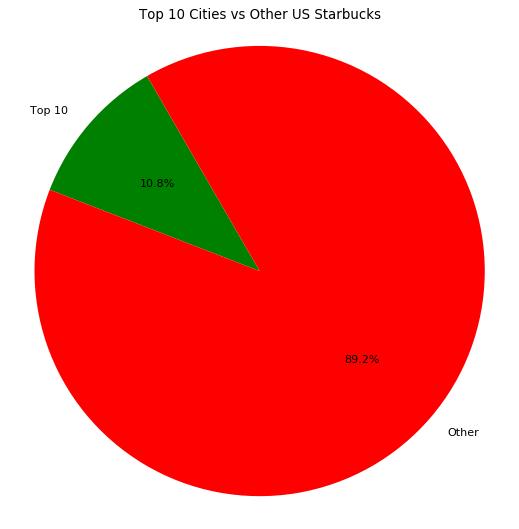

In [62]:
# Create Label Categories and Data Values
label = ["Top 10 ", "Other"]
value = [(total_locations_top_city / total_locations_us), ((total_locations_us - total_locations_top_city) / total_locations_us) ]
colors = ["green", "red"]
explode = (0.0, 0)

# size figure prior to adding data
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

# add data to pie chart
plt.title("Top 10 Cities vs Other US Starbucks")
plt.pie(value, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=120)
plt.axis("equal")

plt.savefig("Images/Top 10 Cities Pie.png")

## Florida Starbucks Analysis

In [40]:
# Files to Load
census_data_load = 'data/Census Data.csv'
starbucks_count_load = 'data/Starbucks Zip Code Count.csv'

# Read School and Student Data File and store into Pandas Data Frames
census_data = pd.read_csv(census_data_load)
starbucks_count = pd.read_csv(starbucks_count_load)

# Combine the data into a single dataset
combined_starbucks = pd.merge(census_data, starbucks_count, how = 'left', on = ['Zip Code']).fillna(0)


# Display the data table for preview
combined_starbucks.head()

,Zip Code,State,Population,Median Age,Per Capita Income,Poverty Count,Count Starbucks
0,1001,MA,17423,45.0,30430,1462,0.0
1,1002,MA,29970,23.2,26072,8351,0.0
2,1003,MA,11296,19.9,3829,54,0.0
3,1005,MA,5228,44.1,32169,230,0.0
4,1007,MA,14888,42.5,36359,1410,0.0


## Florida Rundown

In [42]:
# Create data series of FL Starbucks locations
FL_starbucks = combined_starbucks[(combined_starbucks['State'] == 'FL')].reset_index(drop=True)
FL_starbucks['% Poverty Rate'] = ((FL_starbucks['Poverty Count'] / FL_starbucks['Population'])*100).map("{:,.2f}".format)

# Calculate the totals, averages and rates
fl_tot_zip = FL_starbucks['Zip Code'].count()
fl_tot_pop = FL_starbucks['Population'].sum()
fl_avg_median_age = ((FL_starbucks['Population']*FL_starbucks['Median Age']).sum())/fl_tot_pop
fl_avg_per_capita_inc = ((FL_starbucks['Population']*FL_starbucks['Per Capita Income']).sum())/fl_tot_pop
fl_poverty_rate = (FL_starbucks['Poverty Count'].sum() / FL_starbucks['Population'].sum())*100
fl_tot_starbucks = FL_starbucks['Count Starbucks'].sum()

# Create FL rundown data frame
FL_rundown = pd.DataFrame({"Total Zip Codes": [fl_tot_zip], 
                           "Total Population": [fl_tot_pop], 
                           "Median Age": [fl_avg_median_age],
                           "Average Per Capita Income": [fl_avg_per_capita_inc], 
                           "% Poverty Rate": [fl_poverty_rate],
                           "Total Starbucks": [fl_tot_starbucks]})

# Format data
FL_rundown["Total Population"] = FL_rundown["Total Population"].map("{:,}".format)
FL_rundown["Median Age"] = FL_rundown["Median Age"].map("{:,.2f}".format)
FL_rundown["Average Per Capita Income"] = FL_rundown["Average Per Capita Income"].map("${:,.2f}".format)
FL_rundown["% Poverty Rate"] = FL_rundown["% Poverty Rate"].map("{:,.2f}".format)

FL_rundown

,Total Zip Codes,Total Population,Median Age,Average Per Capita Income,% Poverty Rate,Total Starbucks
0,969,"19,932,688",42.06,"$27,598.07",15.75,660.0


## Florida Top 5 Zip Codes

In [43]:
# Sort and show top 5 cities based on Starbucks totals
top_FL_starbucks = FL_starbucks.sort_values(["Count Starbucks"], ascending=False).reset_index(drop=True)
top_FL_starbucks = top_FL_starbucks[["Zip Code", "Population", "Median Age", "Per Capita Income", "Poverty Count", "Count Starbucks"]]
top_FL_starbucks.set_index('Zip Code', inplace = True)
del top_FL_starbucks.index.name
top_FL_starbucks.head(5)

,Population,Median Age,Per Capita Income,Poverty Count,Count Starbucks
33607,25103,35.7,23329,7013,11.0
32819,27620,40.4,39575,3057,11.0
33139,38027,39.7,56281,6118,8.0
33511,54641,35.8,27653,5874,6.0
32830,11,63.3,35091,0,6.0


## Greater Orlando

In [45]:
# File to Load
greater_orlando_zip_load = "data/Greater Orlando Zip Code Data.csv"

# Read data File and store into data frame
greater_orlando_zip = pd.read_csv(greater_orlando_zip_load)

# Combine the data
greater_orlando_starbucks = pd.merge(greater_orlando_zip, FL_starbucks, how = 'left', on = ['Zip Code'])
greater_orlando_starbucks.drop(["State", "Poverty Count"], axis=1, inplace=True)

greater_orlando_starbucks["% Poverty Rate"] = greater_orlando_starbucks["% Poverty Rate"].astype('float64')

greater_orlando_starbucks.sort_values(["Count Starbucks"], ascending=False).head()

,Zip Code,Area,Population,Median Age,Per Capita Income,Count Starbucks,% Poverty Rate
45,32819,Orlando,27620,40.4,39575,11.0,11.07
55,32830,Orlando,11,63.3,35091,6.0,0.00
47,32821,Orlando,16870,32.8,25535,5.0,17.59
52,32827,Orlando,8953,37.0,38298,5.0,5.08
19,32765,Oviedo,61426,33.4,29809,4.0,10.94


## Greater Orlando Starbucks by Area

In [46]:
# Calculate Area Totals
greater_orlando_by_area = greater_orlando_starbucks.copy()
greater_orlando_by_area.drop("Zip Code", axis = 1, inplace=True)
greater_orlando_by_area["Median Age"] = greater_orlando_by_area["Population"] * greater_orlando_starbucks["Median Age"]
greater_orlando_by_area["Per Capita Income"] = greater_orlando_by_area["Population"] * greater_orlando_starbucks["Per Capita Income"]
greater_orlando_by_area["% Poverty Rate"] = greater_orlando_by_area["Population"] * greater_orlando_starbucks["% Poverty Rate"]

greater_orlando_by_area = greater_orlando_by_area.groupby(["Area"]).sum()
del greater_orlando_by_area.index.name
greater_orlando_by_area["Median Age"] = greater_orlando_by_area["Median Age"] / greater_orlando_by_area["Population"]
greater_orlando_by_area["Per Capita Income"] = greater_orlando_by_area["Per Capita Income"] / greater_orlando_by_area["Population"]
greater_orlando_by_area["% Poverty Rate"] = greater_orlando_by_area["% Poverty Rate"] / greater_orlando_by_area["Population"]

# Format data
greater_orlando_by_area["Population"] = greater_orlando_by_area["Population"].map("{:,}".format)
greater_orlando_by_area["Median Age"] = greater_orlando_by_area["Median Age"].map("{:,.2f}".format)
greater_orlando_by_area["Per Capita Income"] = greater_orlando_by_area["Per Capita Income"].map("${:,.2f}".format)
greater_orlando_by_area["% Poverty Rate"] = greater_orlando_by_area["% Poverty Rate"].map("{:,.2f}".format)

greater_orlando_by_area.sort_values(["Count Starbucks"], ascending=False).head()

,Population,Median Age,Per Capita Income,Count Starbucks,% Poverty Rate
Orlando,"627,809",34.80,"$26,317.75",45.0,17.12
Winter Park,"76,542",37.43,"$37,111.81",6.0,15.36
Altamonte Springs,"57,080",40.34,"$28,396.70",5.0,13.43
Oviedo,"78,125",34.17,"$30,502.40",4.0,9.86
Alafaya,"63,788",32.10,"$26,849.00",3.0,16.11


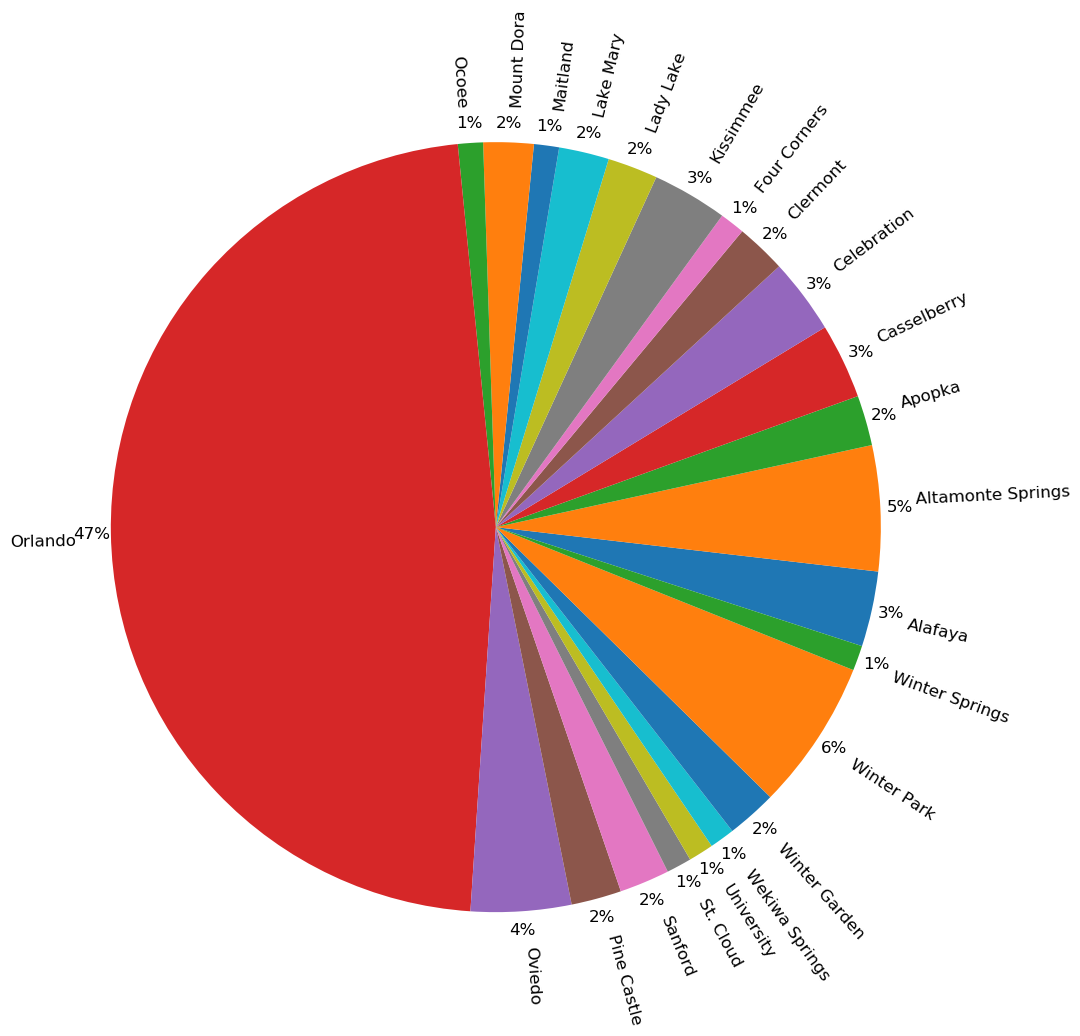

In [47]:
area_go = greater_orlando_by_area.reset_index()
area_go = area_go.loc[area_go["Count Starbucks"] > 0]

explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(25,12.5))
# plot chart
ax1 = plt.subplot(aspect='equal')
area_go.plot(kind='pie', y = 'Count Starbucks', ax=ax1, autopct='%1.0f%%', pctdistance = 1.05, #explode = explode,
             startangle=-18, labels = area_go['index'], legend = False, fontsize=12, rotatelabels = 90, labeldistance = 1.09)

ax1.set_ylabel('')
#ax1.set_title('Greater Orlando Starbucks Locations by Area', y=1.1, fontsize = 15)\

plt.savefig("Images/Greater Orlando Area Pie.png")

In [48]:
# Establish the bins 
population_bins = [0, 20000, 40000, 60000, 80000]
group_names = ["<20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000"]

# Categorize the population based on the bins
greater_orlando_starbucks["Population Bins"] = pd.cut(greater_orlando_starbucks["Population"], population_bins, labels=group_names)

pop_bin_sbux = greater_orlando_starbucks.groupby(["Population Bins"]).sum()["Count Starbucks"]

# Assemble into data frame
pop_bin = pd.DataFrame({"Count Starbucks" : pop_bin_sbux})

pop_bin

,Count Starbucks
Population Bins,
"<20,000",25.0
"20,000-40,000",37.0
"40,000-60,000",26.0
"60,000-80,000",7.0


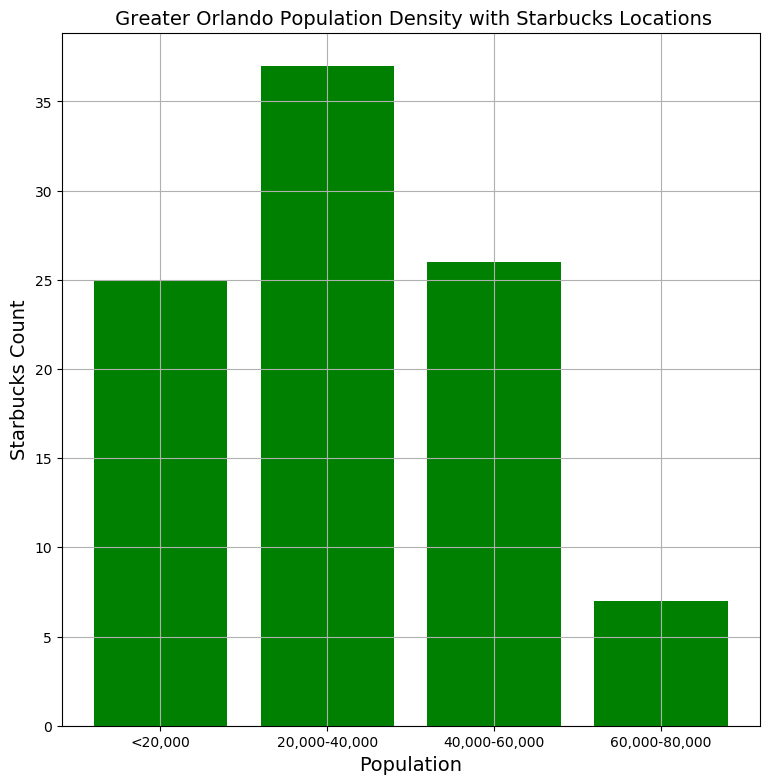

In [49]:
# Build bar graph
pop_x = pop_bin['Count Starbucks'] 

plt.bar(group_names, pop_x, color='g', alpha=1, align="center")

# Incorporate the other graph properties
plt.title(' Greater Orlando Population Density with Starbucks Locations', fontsize = 14)
plt.ylabel('Starbucks Count', fontsize = 14)
plt.xlabel('Population', fontsize = 14)
plt.gcf().set_size_inches(9, 9)
plt.grid(True)

plt.savefig("Images/Greater Orlando Population with Starbucks Bar.png")

In [50]:
no_sbux_go = greater_orlando_starbucks.reset_index()
no_sbux_go = no_sbux_go.loc[no_sbux_go["Count Starbucks"] == 0]

# Establish the bins 
population_bins = [0, 20000, 40000, 60000, 80000]
group_names = ["<20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000"]

# Categorize the population based on the bins
no_sbux_go["Population Bins"] = pd.cut(no_sbux_go["Population"], population_bins, labels=group_names)

no_sbux_pop_bin = no_sbux_go.groupby(["Population Bins"]).count()["Count Starbucks"]

# Assemble into data frame
no_sbux_pop = pd.DataFrame({"Count Zip Codes" : no_sbux_pop_bin})

no_sbux_pop

,Count Zip Codes
Population Bins,
"<20,000",33
"20,000-40,000",13
"40,000-60,000",6
"60,000-80,000",0


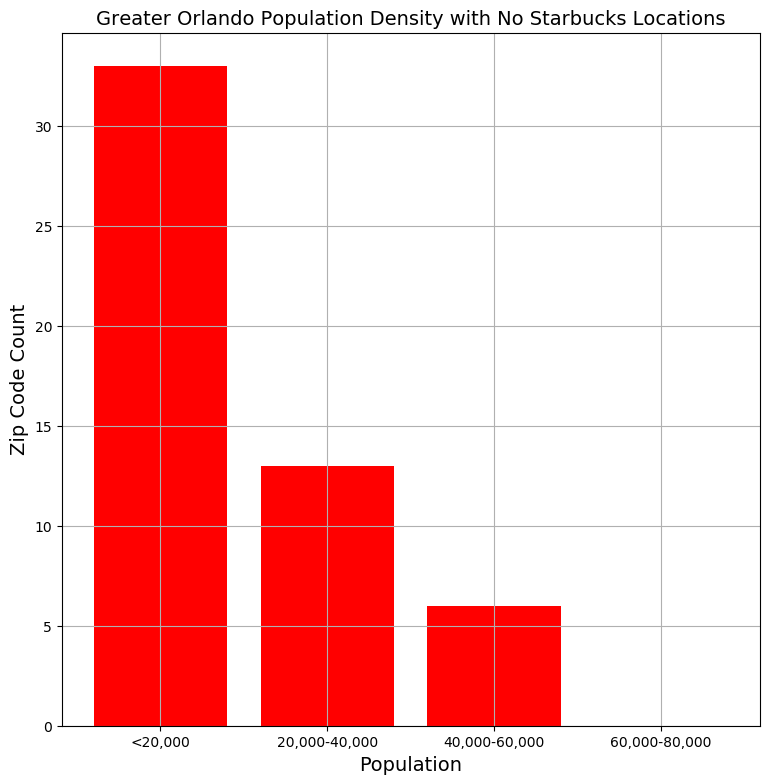

In [51]:
# Build bar graph
no_sbux_pop_x = no_sbux_pop['Count Zip Codes'] 

plt.bar(group_names, no_sbux_pop_x, color='r', alpha=1, align="center")

# Incorporate the other graph properties
plt.title('Greater Orlando Population Density with No Starbucks Locations', fontsize = 14)
plt.ylabel('Zip Code Count', fontsize = 14)
plt.xlabel('Population', fontsize = 14)
plt.gcf().set_size_inches(9, 9)
plt.grid(True)

plt.savefig("Images/Greater Orlando Population with No Starbucks Bar.png")

In [52]:
# Establish the bins 
age_bins = [0, 30, 40, 50, 60, 70]
group_names = ["<30", "30-40", "40-50", "50-60", "60-70"]

# Categorize the population based on the bins
greater_orlando_starbucks["Age Bins"] = pd.cut(greater_orlando_starbucks["Median Age"], age_bins, labels=group_names)

age_bin_sbux = greater_orlando_starbucks.groupby(["Age Bins"]).sum()["Count Starbucks"]

# Assemble into data frame
age_bin = pd.DataFrame({"Count Starbucks" : age_bin_sbux})

age_bin

,Count Starbucks
Age Bins,
<30,2.0
30-40,58.0
40-50,27.0
50-60,0.0
60-70,8.0


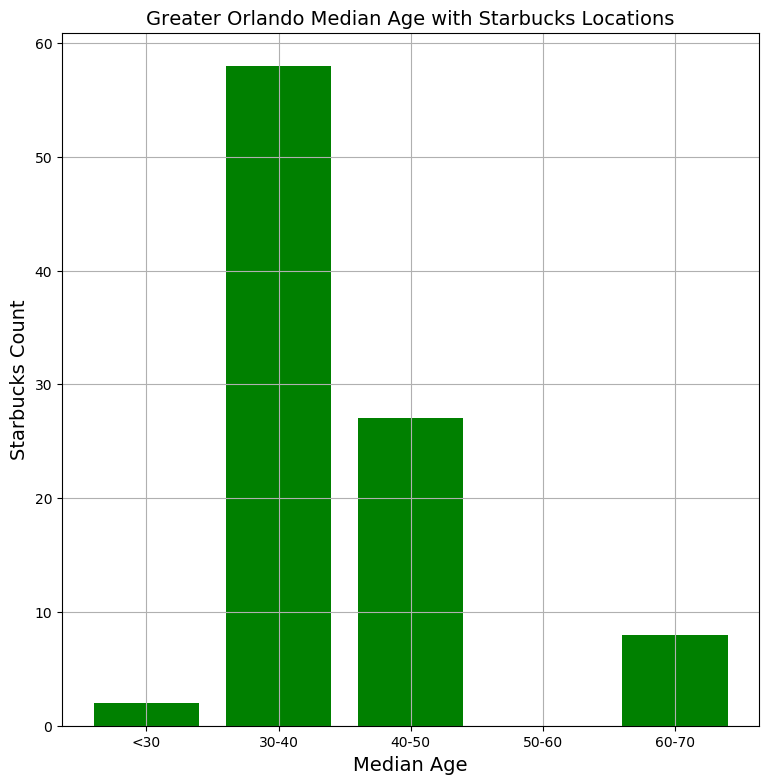

In [53]:
# Build bar graph
age_x = age_bin['Count Starbucks'] 

plt.bar(group_names, age_x, color='g', alpha=1, align="center")

# Incorporate the other graph properties
plt.title('Greater Orlando Median Age with Starbucks Locations', fontsize = 14)
plt.ylabel('Starbucks Count', fontsize = 14)
plt.xlabel('Median Age', fontsize = 14)
plt.gcf().set_size_inches(9, 9)
plt.grid(True)

plt.savefig("Images/Greater Orlando Median Age with Starbucks Bar.png")

In [54]:
# Categorize the population based on the bins
no_sbux_go["Median Age Bins"] = pd.cut(no_sbux_go["Median Age"], age_bins, labels=group_names)

no_sbux_age_bin = no_sbux_go.groupby(["Median Age Bins"]).count()["Count Starbucks"]

# Assemble into data frame
no_sbux_age = pd.DataFrame({"Count Zip Codes" : no_sbux_age_bin})

no_sbux_age

,Count Zip Codes
Median Age Bins,
<30,2
30-40,25
40-50,13
50-60,8
60-70,4


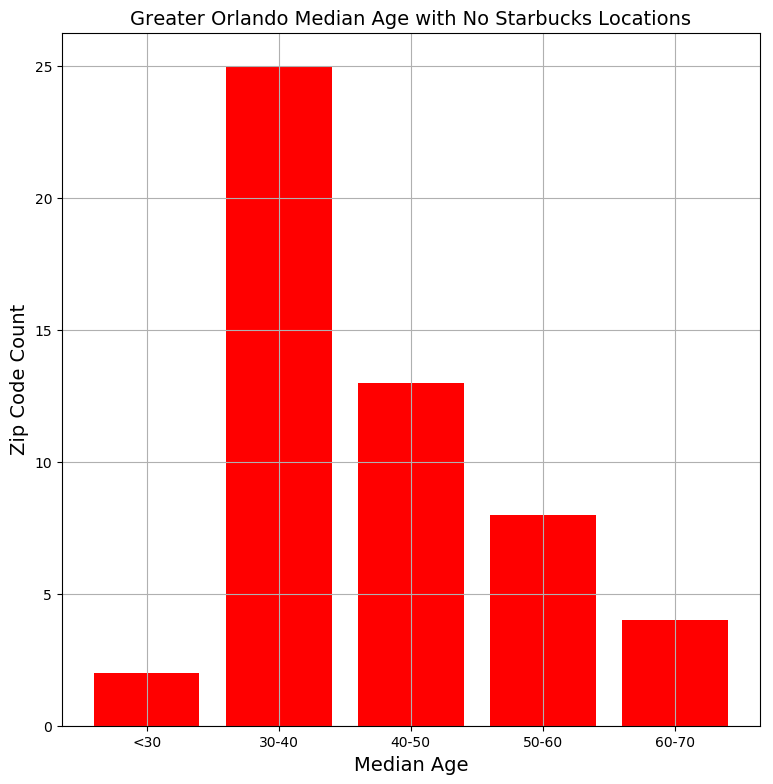

In [55]:
# Build bar graph
no_sbux_age_x = no_sbux_age['Count Zip Codes'] 

plt.bar(group_names, no_sbux_age_x, color='r', alpha=1, align="center")

# Incorporate the other graph properties
plt.title('Greater Orlando Median Age with No Starbucks Locations', fontsize = 14)
plt.ylabel('Zip Code Count', fontsize = 14)
plt.xlabel('Median Age', fontsize = 14)
plt.gcf().set_size_inches(9, 9)
plt.grid(True)

plt.savefig("Images/Greater Orlando Median Age with No Starbucks Bar.png")

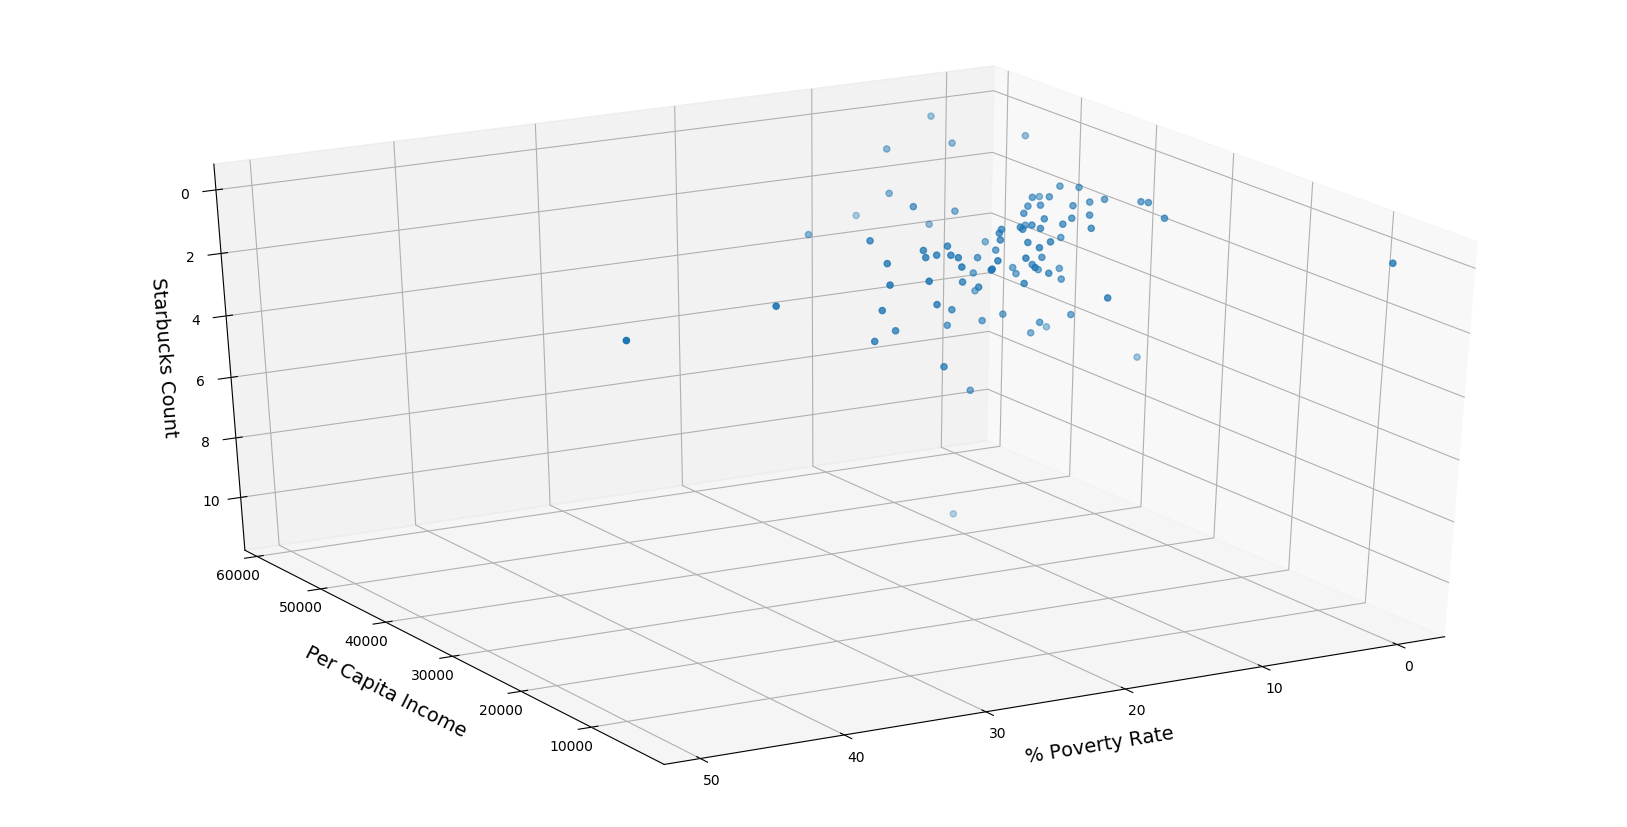

In [56]:
import matplotlib.pyplot as pyplot

fig = pyplot.figure(figsize=(16,8))
ax = Axes3D(fig)

x_vals = greater_orlando_starbucks['% Poverty Rate']
y_vals = greater_orlando_starbucks['Per Capita Income']
z_vals = greater_orlando_starbucks['Count Starbucks']

ax.scatter(x_vals, y_vals, z_vals)
ax.set_xlabel('% Poverty Rate', labelpad = 14, fontsize = 14)
ax.set_ylabel('Per Capita Income', labelpad = 14, fontsize = 14)
ax.set_zlabel('Starbucks Count', fontsize = 14)
ax.view_init(330)

plt.savefig("Images/Greater Orlando Poverty & Income vs Starbucks Counts 3D Scatter.png")

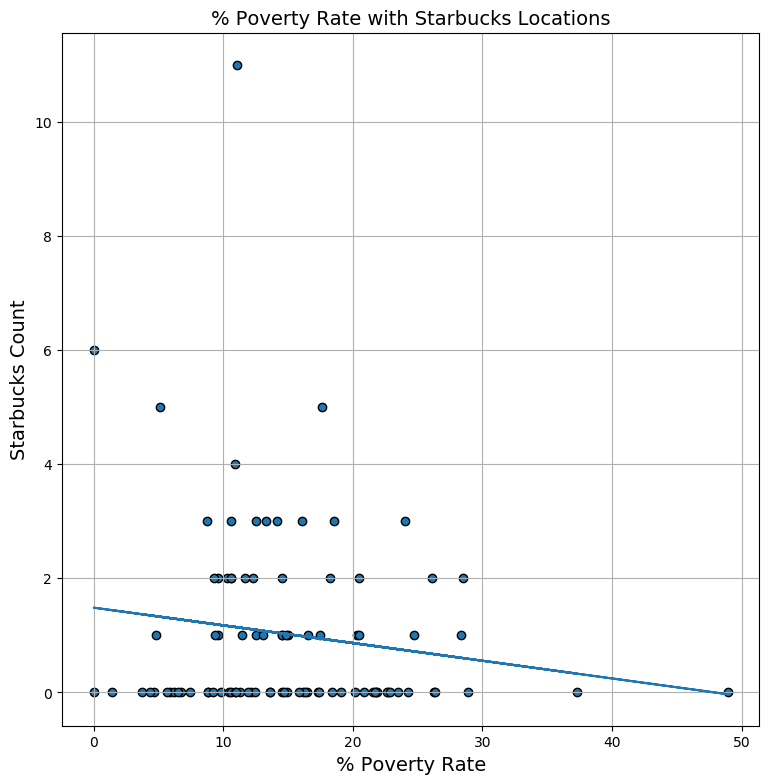

In [57]:
# Build scatter plot
plt.scatter(greater_orlando_starbucks['% Poverty Rate'], greater_orlando_starbucks['Count Starbucks'], marker='o', edgecolors = 'black')

# Fit with polyfit
b, m = polyfit(greater_orlando_starbucks['% Poverty Rate'], greater_orlando_starbucks['Count Starbucks'], 1)
plt.plot(greater_orlando_starbucks['% Poverty Rate'], b + m * greater_orlando_starbucks['% Poverty Rate'], '-')

# Incorporate the other graph properties
plt.title('% Poverty Rate with Starbucks Locations', fontsize = 14)
plt.ylabel('Starbucks Count', fontsize = 14)
plt.xlabel('% Poverty Rate', fontsize = 14)
plt.gcf().set_size_inches(9, 9)
plt.grid(True)

plt.savefig("Images/Greater Orlando Poverty vs Starbucks Counts Scatter.png")

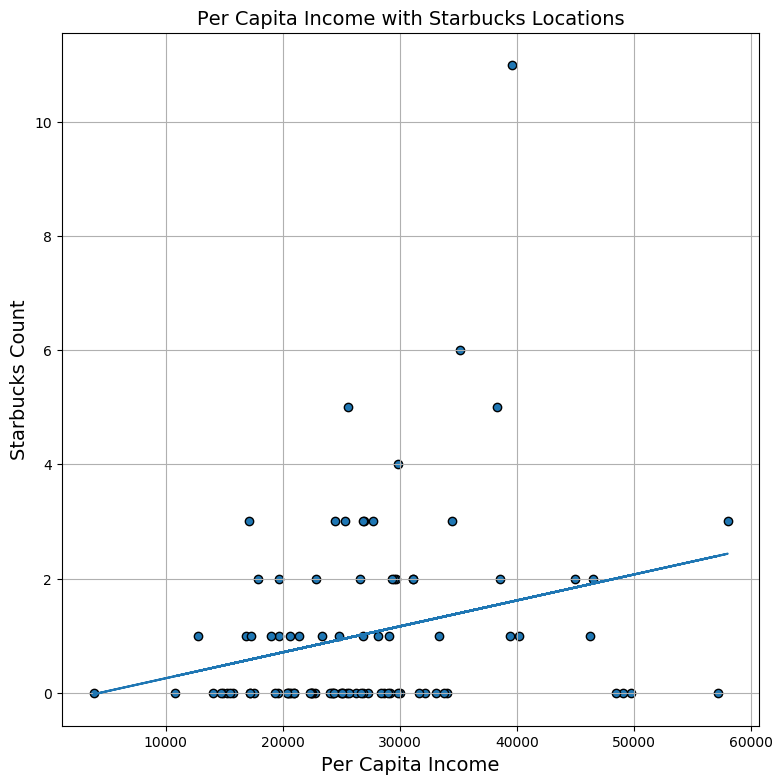

In [58]:
# Build scatter plot
plt.scatter(greater_orlando_starbucks['Per Capita Income'], greater_orlando_starbucks['Count Starbucks'], marker='o', edgecolors = 'black')

# Fit with polyfit
b, m = polyfit(greater_orlando_starbucks['Per Capita Income'], greater_orlando_starbucks['Count Starbucks'], 1)
plt.plot(greater_orlando_starbucks['Per Capita Income'], b + m * greater_orlando_starbucks['Per Capita Income'], '-')

# Incorporate the other graph properties
plt.title('Per Capita Income with Starbucks Locations', fontsize = 14)
plt.ylabel('Starbucks Count', fontsize = 14)
plt.xlabel('Per Capita Income', fontsize = 14)
plt.gcf().set_size_inches(9, 9)
plt.grid(True)

plt.savefig("Images/Greater Orlando Income vs Starbucks Counts Scatter.png")

In [59]:
opportunity_go = greater_orlando_starbucks.loc[greater_orlando_starbucks["% Poverty Rate"] < 20]
opportunity_go = opportunity_go.loc[opportunity_go["Per Capita Income"] > 20000]
opportunity_go = opportunity_go.loc[opportunity_go["Median Age"] < 40]
opportunity_go = opportunity_go.loc[opportunity_go["Count Starbucks"] == 0]
opportunity_go = opportunity_go.loc[opportunity_go["Population"] > 20000].reset_index(drop=True)

opportunity_go

,Zip Code,Area,Population,Median Age,Per Capita Income,Count Starbucks,% Poverty Rate,Population Bins,Age Bins
0,32824,Meadow Woods,41857,35.8,20981,0.0,16.19,"40,000-60,000",30-40
1,32829,Orlando,21156,33.5,24322,0.0,11.88,"20,000-40,000",30-40
2,32832,Orlando,21413,31.6,29133,0.0,6.23,"20,000-40,000",30-40
3,34772,St. Cloud,29182,37.0,22336,0.0,10.95,"20,000-40,000",30-40
4,34786,Lake Butler,38249,35.2,49054,0.0,6.47,"20,000-40,000",30-40
